In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('smartwatches.csv')

#Cleaning and tidying the data set

#Dropping the first column of the dataset as it consists of an Unnamed column which wont be required for the analysis
df = df.drop(df.columns[0], axis = 1)
df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3 inches,NaN
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1 inches,NaN
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3 inches,NaN
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1 inches,NaN


In [14]:
#Finding the different types of Models available per brand
df_models = df.drop_duplicates(subset='Model Name')
df_models = df_models.dropna(subset='Model Name')

#Counting the number of unique brands and unique model names
brand = df_models['Brand'].unique()
print('There are a total of ' + str(len(brand)) + ' unique brands')
models = len(df_models['Model Name'].unique())
print('There are a total of ' + str(models) + ' unique models')

There are a total of 17 unique brands
There are a total of 389 unique models


In [15]:
#Grouping the values to see the number of watches for each brand
df_grouped = df_models.groupby('Brand')['Current Price'].count().reset_index()

df_sorted = df_grouped.sort_values(by='Current Price', ascending=False).reset_index()

df_sorted = df_sorted.drop(columns=['index'])
df_sorted.columns = ['Brand', 'Count']

#Export the count of each brand to a csv for tableau visualization
df_sorted.to_csv('high_count_brand.csv')

print('The brand with the most offering is \'' + df_sorted['Brand'][0] + '\' with an offering of ' + str(df_sorted['Count'][0]) + ' counts')

The brand with the most offering is 'noise' with an offering of 41 counts


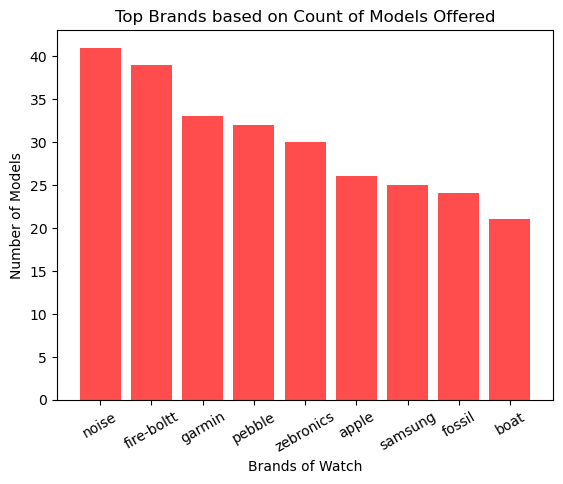

<Figure size 640x480 with 0 Axes>

In [16]:
#Visualizing the number of models per brand

#Sorting the Top 10 brands in the indian watch market
df_top10 = df_sorted.iloc[:9]

plt.bar(df_top10.Brand, df_top10.Count, color='#ff4d4d')
plt.xticks(rotation=30)
plt.xlabel('Brands of Watch')
plt.ylabel('Number of Models')
plt.title('Top Brands based on Count of Models Offered')
plt.savefig('Top10Brands.png')
plt.show()
plt.clf()

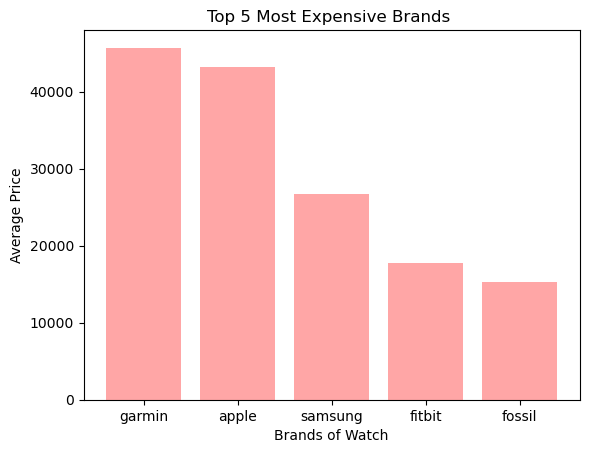

<Figure size 640x480 with 0 Axes>

In [17]:
#Finding the average price per brand
df1 = df.drop_duplicates(subset='Model Name')
df1 = df1.dropna(subset='Model Name')

#Count of each brand
df_count = df1.groupby('Brand')['Model Name'].count().reset_index()

#Total of sum of price of all offerings
df_price = df1.groupby('Brand')['Current Price'].sum().reset_index()

#Creating a new column Avg, by dividing Current price and Number of models
df_price['Count'] = df_count['Model Name']
df_price['Count'] = df_price['Count'].astype('float')
df_price['Avg'] = (df_price['Current Price']/df_price['Count']).round(2)

df_psorted = df_price.sort_values(by='Avg', ascending=False).reset_index()

df_psorted = df_psorted[['Brand','Avg']]
df_psorted.to_csv('Most_Expensive.csv')

#Getting the top 5

df_top5 = df_psorted.iloc[:5]

plt.bar(df_top5['Brand'],df_top5['Avg'], color='#ffa6a6')
plt.xlabel('Brands of Watch')
plt.ylabel('Average Price')
plt.title('Top 5 Most Expensive Brands ')
plt.savefig('Top5Expensive.png')
plt.show()
plt.clf()

(389, 4)
Coefficient of Correlation: 0.40238966402145354
This shows that rating is correlated to price but not very strongly 


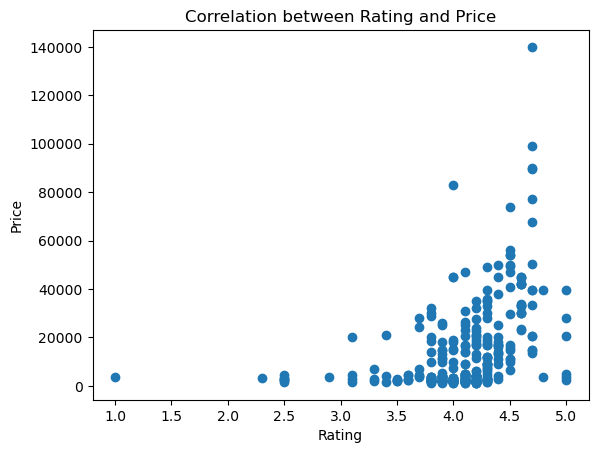

<Figure size 640x480 with 0 Axes>

In [18]:
#Correlation between rating and price

df_ratprice = df_models[['Model Name', 'Current Price', 'Rating', 'Number OF Ratings']]
print(df_ratprice.shape)
df_ratprice = df_ratprice.dropna(subset='Number OF Ratings')
df_ratprice = df_ratprice[['Model Name', 'Current Price', 'Rating']]

df_ratprice.to_csv('RatingPrice.csv')
#Finding correlation coeffiecient to see if there is any correlation between rating and Price
df_corr = df_ratprice[['Current Price', 'Rating']]

#Dropping the empty rows with Rating
df_corr = df_corr.dropna(subset='Rating')

#Finding correlation coeffecient
corr = df_corr.corr(method='pearson')
corr.reset_index()

#Creating a scatter plot
print('Coefficient of Correlation: ' + str(corr['Current Price'][1]))
print('This shows that rating is correlated to price but not very strongly ')


plt.scatter(df_corr['Rating'], df_corr['Current Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Correlation between Rating and Price')
plt.savefig('RatingPrice.png')
plt.show()
plt.clf()

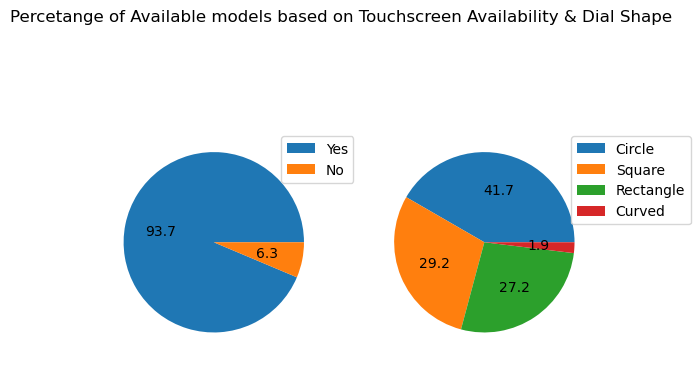

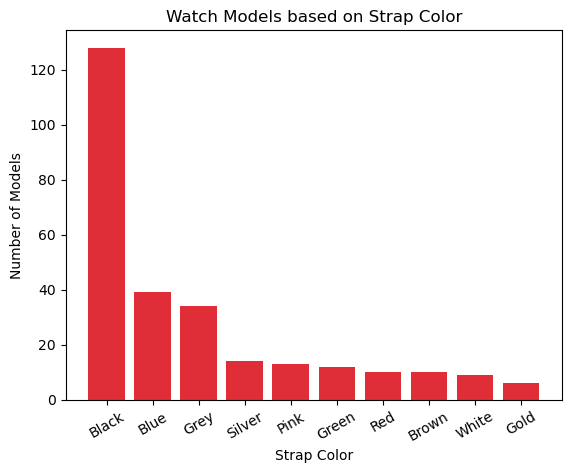

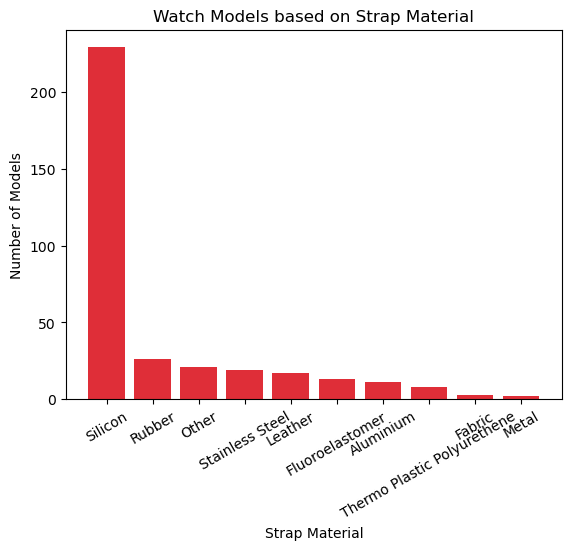

<Figure size 640x480 with 0 Axes>

In [19]:
#Pie chart for touch screen
df_screen = df_models.dropna(subset = 'Touchscreen')
df_screen = df_screen['Touchscreen'].value_counts().reset_index()
df_screen.columns = ['touch_screen', 'count']
df_screen

#Pie chart for watch faces
df_dial = df_models['Dial Shape'].dropna().value_counts().reset_index()
df_dial.columns = ['Shape', 'Count']
df_dial = df_dial.iloc[0:4]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Percetange of Available models based on Touchscreen Availability & Dial Shape')


#Visualizing the spread of Touch Screen and non touch screen watches
ax1.pie(df_screen['count'], autopct='%.1f')
ax1.legend(df_screen['touch_screen'], bbox_to_anchor=(1.15, 1), loc='upper right')

#Visualizing the spread of Watch Face and non touch screen watches
ax2.pie(df_dial['Count'], autopct='%.1f')
ax2.legend(df_dial['Shape'], bbox_to_anchor=(1.15, 1), loc='upper center')

fig.savefig('Watch_style.png')
plt.show()
plt.clf()

column_list = ['Strap Color', 'Strap Material']

def pie_subcat(column_name):
    run_df = pd.DataFrame()
    run_df = df_models[column_name].dropna().value_counts().reset_index()
    dftop_10 = run_df.iloc[:10]
    first_column = dftop_10.columns[1]
    dftop_10.columns = [first_column, 'count']
    
    plt.bar(dftop_10[first_column], dftop_10['count'], color='#DF2E38')
    plt.title(f'Watch Models based on {first_column}')
    plt.xlabel(f'{first_column}')
    plt.ylabel('Number of Models')
    plt.xticks(rotation =30)
    plt.savefig(f'{first_column}')
    plt.show()
    plt.clf()
    
    
for item in column_list:
    pie_subcat(item)


In [54]:
#Finding the market share based on demand

df_demand = df_models.groupby('Brand')['Number OF Ratings'].sum().reset_index()
df_demand = df_demand.sort_values(by='Number OF Ratings', ascending=False).reset_index()
 
df_demand = df_demand.drop(df_demand.columns[0], axis=1)
total_sales = np.sum(df_demand['Number OF Ratings'])

print(total_sales)
df_demand['Market Share'] = ((df_demand['Number OF Ratings']/total_sales)* 100).round(2)

df_demand.columns = ['Brand', 'Sales', 'Market Share']
df_demand.to_csv('market_share.csv')
df_demand

4048220.0


,Brand,Sales,Market Share
0,noise,1591290.0,39.31
1,boat,1167007.0,28.83
2,dizo,346080.0,8.55
3,fire-boltt,300095.0,7.41
4,apple,172184.0,4.25
5,ambrane,116132.0,2.87
6,samsung,108910.0,2.69
7,pebble,57403.0,1.42
8,honor,51863.0,1.28
9,zebronics,27572.0,0.68


In [ ]:
#Understand the top 5 models for top 3